<a href="https://colab.research.google.com/github/evs-11/Regresion-Lineal-II/blob/main/Regresi%C3%B3n_Lineal_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regresión Lineal II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [ ]:
import pandas as pd


## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de varios estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta a la economía ha afectado significativamente las inversiones y ganancias de este sector. Este escenario fomenta un mayor interés en los estudios de previsión de la demanda basados ​​en las características de este mercado, los inmuebles y el entorno de estos inmuebles.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el principal objetivo de nuestro proyecto es desarrollar un sistema de valuación inmobiliaria utilizando la metodología de regresión lineal, que es una de las técnicas de Machine Learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro *dataset* es una muestra aleatoria de 5000 inmuebles disponibles para la venta en el municipio de Rio de Janeiro.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (US$) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble a la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble a la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [ ]:
datos = pd.read_csv('dataset.csv',sep=';')

## Ver los datos

In [ ]:
datos

,Valor,Area,Dist_Playa,Dist_Farmacia
0,850277,280,0.240925,0.793637
1,166359,208,0.904136,0.134494
2,471349,170,0.059525,0.423318
3,101664,100,2.883181,0.525064
4,406654,164,0.239758,0.192374
...,...,...,...,...
4995,135860,70,0.479357,0.752891
4996,166359,128,8.594487,0.370170
4997,147874,70,0.253138,0.421407
4998,35120,55,8.945226,0.680963


## Verificando el tamaño del dataset

In [ ]:
datos.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Analisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadísticos descriptivos


In [ ]:
datos.describe().round(2)

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,259320.95,121.94,3.02,0.50
std,348108.85,90.54,3.17,0.29
min,13863.00,16.00,0.00,0.00
25%,85028.00,70.00,0.44,0.24
50%,151571.00,93.00,1.48,0.50
75%,293900.00,146.00,5.61,0.75
max,4621072.00,2000.00,17.96,1.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [ ]:
# una asociación positiva significa que las dos variables tienen una relación directa
# o sea si una variable sube la otra también. En la negativa si una variable sube la otra baja.
datos.corr().round(4)

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Playa,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

In [ ]:
import seaborn as sns

## Configuración del formato de los gráficos

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
# es la paleta de colores
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
# esto es sobre el estilo del gráfico
sns.set_style("darkgrid")


## Box plot de la variable *dependiente* (y)

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Precio de los Inmuebles'}, xlabel='Dolares'>

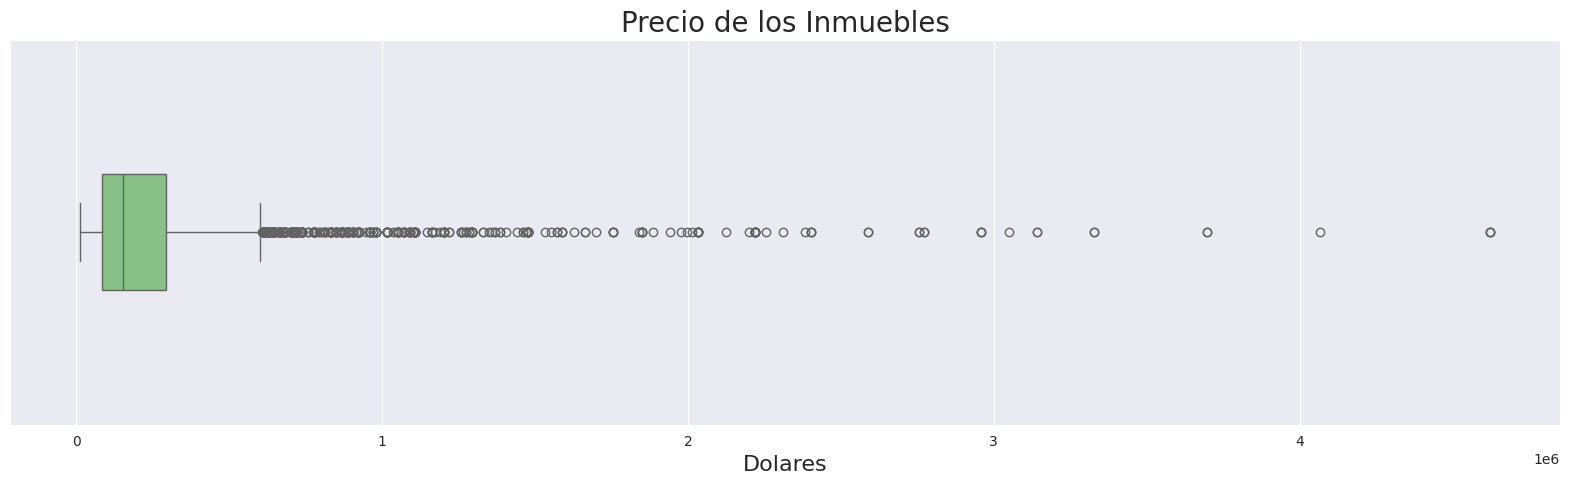

In [ ]:
ax=sns.boxplot(data=datos['Valor'],orient='h',width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Precio de los Inmuebles', fontsize=20)
ax.set_xlabel('Dolares', fontsize=16)
ax

Se ve una asimetria a la derecha en la variable precio de los inmuebles. Con comportamiento peculiar con muchos puntosencima del límite superior.Recordar que en el Boxplot vemos el Q1, mediana y el Q3

# <font color='red' style='font-size: 30px;'>2.2 Distribución de frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/tmp/ipython-input-3091160960.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(datos['Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='Precio de los Inmuebles (US$)', ylabel='Density'>

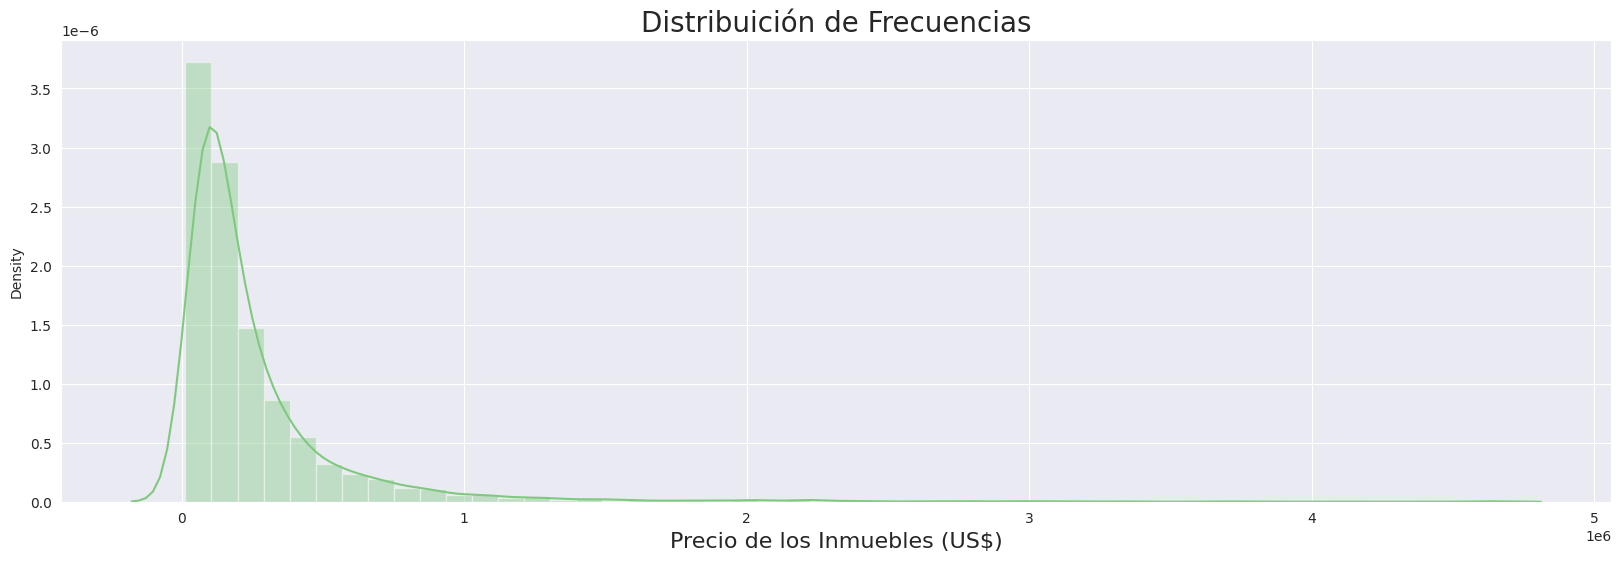

In [ ]:
ax=sns.distplot(datos['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('Precio de los Inmuebles (US$)', fontsize=16)
ax

La asimetria a la derecha tiene sentido donde hay muchos inmuebles con precios bajos y pocos inmuebles con precios extravagantes o sea de lujo.

<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Box-Plot+II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

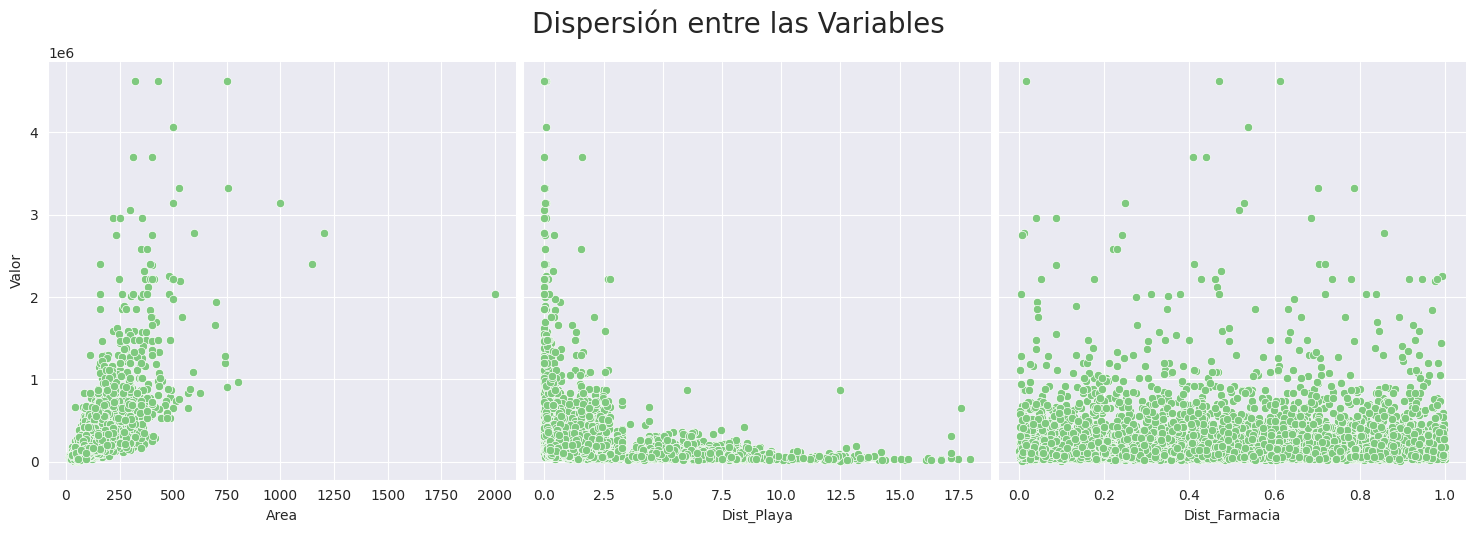

In [ ]:
# y_vars es la variable dependiente, x_vars es la variable explicativa que como hay más de uno ponemos corchetes
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

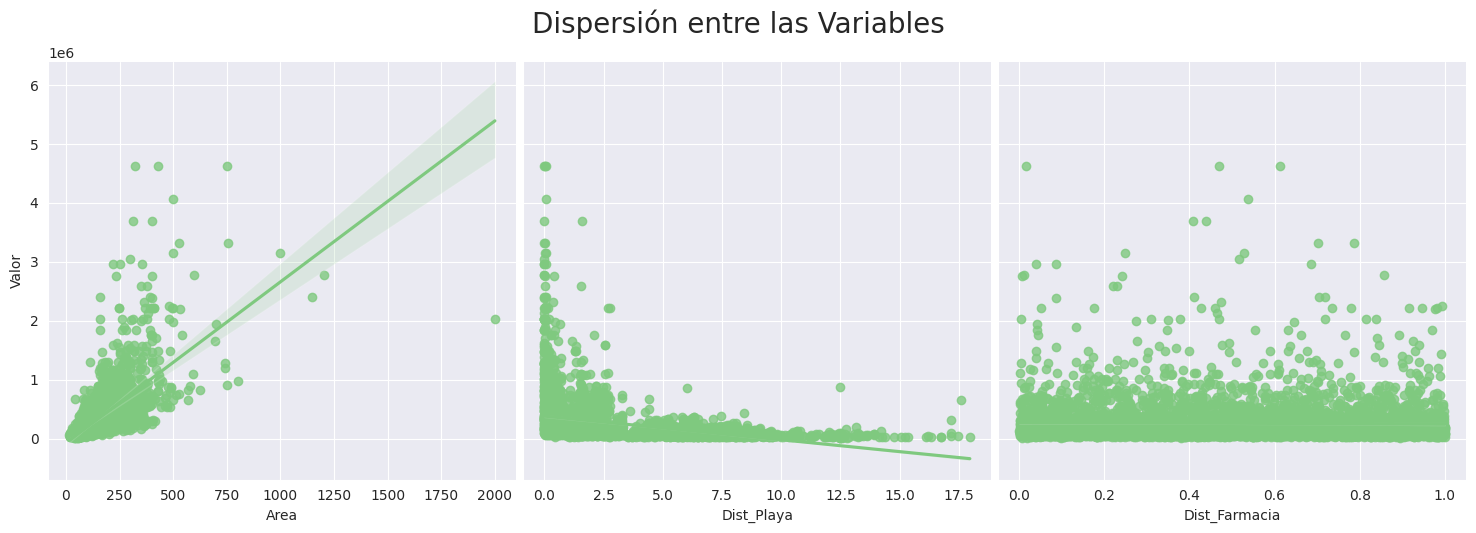

In [ ]:
ax=sns.pairplot(datos,y_vars='Valor',x_vars=['Area','Dist_Playa','Dist_Farmacia'],height=5,kind='reg') # kind='reg' de regresión
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.05)
ax

La variable valor no está relacionada de forma lineal con las variables explicativas por lo tanto no podemos estimar el modelo de regresión lineal.

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribuición Normal
<hr>

### ¿Porque?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Tests paramétricos asumen que los datos muestrales se recopilaron de una población con una distribución de probabilidad conocida. Muchos de los tests estadísticos asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>





<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando la biblioteca numpy

In [ ]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [ ]:
# el logaritmo de uno es cero. Pero el logaritmo de cero es indefinido.
np.log(1)

np.float64(0.0)

In [ ]:
# el modelo de regresión no admite valores indefinidos debemos cambiar sus escalas antes de aplicar log
# creamos el logaritmo de la variable valor. Lo aplicamos directamente a valor pues el valor mínimo es diferente de cero
datos['log_Valor']=np.log(datos['Valor'])
datos['log_Area']=np.log(datos['Area'])
datos['log_Dist_Playa']=np.log(datos['Dist_Playa']+1)             #como tiene valores min en cero debemos antes cambiar la escala agregando +1(a todos los valores originales)
datos['log_Dist_Farmacia']=np.log(datos['Dist_Farmacia']+1)       #como tiene valores min en cero debemos antes cambiar la escala agregando +1(a todos los valores originales)

In [ ]:
datos.head()  # vemos que las variables log fueron creadas

,Valor,Area,Dist_Playa,Dist_Farmacia,log_Valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,850277,280,0.240925,0.793637,13.653317,5.634790,0.215857,0.584245
1,166359,208,0.904136,0.134494,12.021903,5.337538,0.644028,0.126187
2,471349,170,0.059525,0.423318,13.063354,5.135798,0.057821,0.352991
3,101664,100,2.883181,0.525064,11.529429,4.605170,1.356655,0.422036
4,406654,164,0.239758,0.192374,12.915718,5.099866,0.214916,0.175946


## Distribuición de frecuencias de la variable *dependiente transformada* (y)

/tmp/ipython-input-1062038841.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(datos['log_Valor'])


<Axes: title={'center': 'Distribuición de Frecuencias'}, xlabel='log del Precio de los Inmuebles', ylabel='Density'>

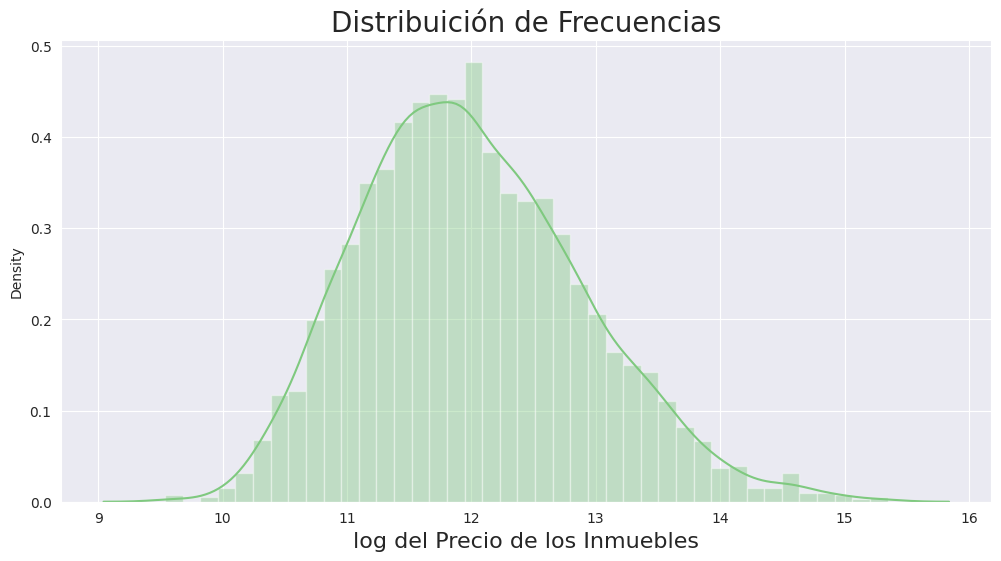

In [ ]:
# contruimos histograma para la variable valor
ax=sns.distplot(datos['log_Valor'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_xlabel('log del Precio de los Inmuebles', fontsize=16)
ax

La variable logaritmica pudo reducir la simetría que había en el histograma de la variable valor.Es parecida al gráfico de Simetría de variable normal.

# <font color='red' style='font-size: 30px;'>3.2 Comprobando relación lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

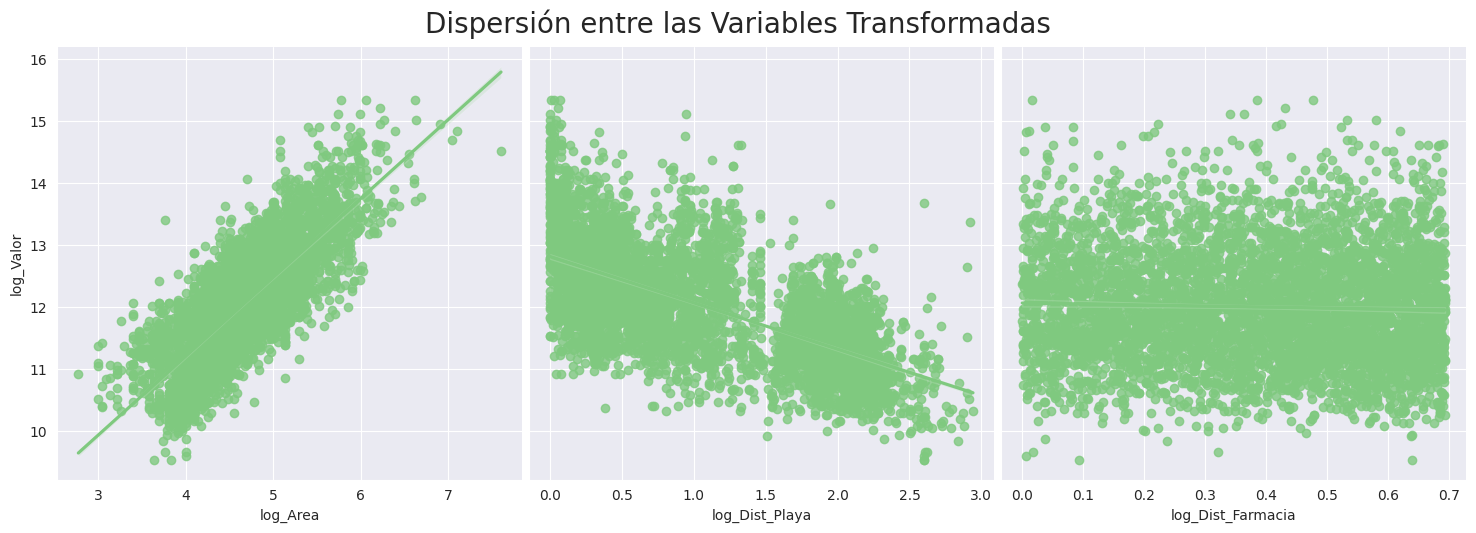

In [ ]:
ax=sns.pairplot(datos,y_vars='log_Valor',x_vars=['log_Area','log_Dist_Playa','log_Dist_Farmacia'],height=5,kind='reg')
ax.fig.suptitle('Dispersión entre las Variables Transformadas', fontsize=20, y=1.05)
ax

Tenemos relaciones más lineales principalmente entre log_valor y log_Area donde vemos una relación lineal positiva. Y entre log_valor y log_dist_playa vemos una relación lineal menos fuerte y negativa. La dirección relación entre log_valor y log_dist_playa el coeficiente de correlación ya nos lo había indicado en la tabla de correclación de las variables originales. Vimos que la correlación entre valor y dist_playa fue negativa. Sin embargo todavía no tenemos una relación lineal entre la variable dependiente y log_dist_farmacia. La variación entre log_valor y log_dist_farmacia es constante, esto también el coeficiente de correlación nos lo había indicado. Pues la correlación de la variable valor y la variable dist_farmacia fue cercano a cero.


Problamente esta variable log_dist_farmacia será eliminada del modelo.

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Creando una Series (pandas) para almacenar el Precio de los Inmubles (y)

In [ ]:
# para usar la función train_test_split debemos crear parámetros.
# primero un df para almacenar la variable dependiente
y=datos['log_Valor']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [ ]:
# el segundo parámetro es el df que almacenará a las variables explicativas
x=datos[['log_Area','log_Dist_Playa','log_Dist_Farmacia']]

## Creando los datasets de entrenamiento y de prueba

In [ ]:
# funciones que almacenan variables de entrenamiento y prueba
# Y es la variable dependiente, X es variables explicativas, test_size es la cant. que vamos a separar para la prueba
# como el proyecto tiene una gran cant. de datos podemos seleccionar 20%(0.2) para la prueba. El 80% restante par el entrenamiento.
# random_state sirve para generar números aleatorios que sean los mismos
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2811)

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.</p>



<img width='800px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1803-regresion-lineal-tecnicas-avanzadas-modelado/Log-lineal.png'>

## Importando la biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [ ]:
import statsmodels.api as sm

## Estimando el modelo con statsmodels

In [ ]:
# nuevo df con variables explicativas
X_train_constante=sm.add_constant(X_train)

In [ ]:
# así se incluye la constante statesmodels(así se representa la matriz teórica X)
X_train_constante

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


Usar los modelos con constantes aseguran que los residuos que son la estimación de Ui tenga un promedio de cero.
Si se hace sin constantes vamos a tener estimaciones sesgadas.


In [ ]:
# para estimar modelos statesmodels
modelo_statsmodels=sm.OLS(y_train,X_train_constante,hascont=True).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando las estadísticas de prueba del modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
# para ver el resultado de la celda anterior
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:29:41   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6534      0.06

. Por ejemplo número de observaciones, 4000, recording, que la función train_test_split, separamos 80% de los datos para entrenamiento. Y aquí tenemos lo que vimos en el curso anterior R2. R2 mide el grado de ajuste del modelo a los datos. El valor fue de 80%, que es un valor alto. Y aquí abajo tenemos como novedad el R2 ajustado. ¿Ajustado en función de qué?

. Ajustado en función de los grados de libertad, los grados de libertad son intervalos muy simples. La cantidad de información que los datos proporcionan y que puede gastar para estimar los coeficientes del modelo. A medida que agregamos una variable a un modelo, perdemos un grado de libertad y eso entra en el cálculo de este R2 ajustado.

. Entonces, el R2 ajustado es una modificación del R2 normal para penalizar el uso de variables que no son relevantes para explicar la variable dependiente. Recuerden, en el curso anterior que el R2 normal, que arriba siempre va a aumentar, incluso si incluimos variables que no aportan en la calidad de las predicciones de la variable dependiente.

. En el peor de los casos el R2 permanecerá constante. Este R2 aquí arriba, el primero permanecerá constante, pero nunca disminuirá el valor. Por lo tanto este R2 ajustada que abajo es una forma de penalizar modelos con muchas variables explicativas que no ayuda en absoluto a la calidad y predictiva del modelo.

. En suma, si agregas más y más variables inútiles al modelo, el R2 ajustado disminuirá, pues perderemos muchos grados de libertad, y las variables no aportarán información de calidad. Caso contrario, si agregas más variables ahora útiles, el R2 ajustado aumentará.

. En suma, la información generada por las variables explicativas tiene que compensar la pérdida de grados de libertad. Bueno, aquí abajo tenemos esa columna llamada coef, que son estimaciones de cada coeficiente del modelo. La primera estimación del intercepto, que en nuestro modelo log-lineal sería lnβ1 en nuestra función log-lineal.

 . Y aquí abajo tenemos los coeficientes estimados: β1, β3 y lo que sería β4 en nuestro caso. Recuerden que en este ejemplo de forma funcional del modelo log-lineal tenemos solo dos variables explicativas, pero en nuestro caso tenemos tres variables explicativas. Entonces sería β2, β3 y β4, pues tenemos tres variables explicativas: log_Area, log_Dist_Playa y log_Dist_farmacia.

. Esa columna es apenas la desviación estándar de cada coeficiente estimado. Bueno, lo que más nos interesa de esta tabla, que son la otra gran novedad de este curso son el test F y el test T. Empezando con el test F, el test F prueba la significancia conjunta de los coeficientes del modelo. O sea, nos dice si el modelo tiene sentido o no.

. La hipótesis nula es de que todos los coeficientes son iguales a 0. O sea, el modelo no existe y la hipótesis alternativa es que al menos uno de los coeficientes es diferente de 0, o sea, al menos una de las variables explicativas influye en la variable dependiente.

. Pero en ese test F, ¿de qué coeficiente estamos hablando? **El test F prueba la significancia conjunta de los coeficientes de regresión.** Los coeficientes de regresión son los coeficientes que multiplican cada variable explicativa, o sea, son los coeficientes, los coeficientes de regresión son aquellos que miden el efecto parcial de cada variable explicativa que serían β2, β3 y β4 en su caso.

. Entonces, el test F prueba la significancia conjunta de los coeficientes de log_Area, log_Dist_Playa y log_Dist_Farmacia todos conjuntamente simultáneamente. O sea, la hipótesis nula es de esos tres coeficientes son iguales a 0 y la hipótesis alternativa es de que al menos uno de esos coeficientes de regresión es diferente de 0. ¿Cómo verifico esto de manera simple?

. ¿Cómo hago ese test de manera simple? Aquí abajo tenemos prob. Prob es lo que llamamos P valor. Entonces aquí tenemos el P valor del test F que en nuestro caso es igual a 0. Entonces, miren esta regla sencilla que yo puse aquí para facilitar la compresión, siempre el valor es mayores que 0.05 entonces aceptamos la hipótesis nula y rechazamos el modelo.

. Y ese modelo no es estadísticamente significativo y siempre valor del test F es menor que 0.05. Entonces podemos rechazar la hipótesis nula y decir que nuestro modelo es estadísticamente significante al nivel de 5% de significancia. O sea, nuestro modelo pasó la prueba F, el nivel 5% de significancia, el nivel de 5% es lo que se suele usar en todos los tests estadísticos, los tests estadísticos más habituales.

. Bueno, así que nuestro modelo pasó al test F. Ahora necesitamos verificar el test T. Aquí tenemos las estadísticas T. Las estadísticas T, en esta columna, **las estadísticas T prueban la importancia individual de cada coeficiente.** La hipótesis nula es de que el coeficiente es igual a 0. Y la hipótesis alternativa es de que el coeficiente es diferente de 0.

. Entonces aquí tenemos cuatro estadísticas T, o sea para cada coeficiente del modelo. El test T funciona de manera similar a la prueba F, pero prueba cada coeficiente individualmente. Por eso tenemos cuatro. Tenemos estadísticas T para cada coeficiente, tenemos cuatro coeficientes, contando que el tercero entonces vamos a tener cuatro estadísticas T.

. Siguiendo la misma lógica que el test F, aquí en esta columna tenemos P, que sería el P valor de cada estadística T, equivalente a Prop, al P valor estadística F. Entonces aquí tenemos los P valores de cada estadística T, siguiendo la misma lógica del test F, si el P valor estadística T es mayor que 0.05, entonces aceptamos la hipótesis nula de que el coeficiente es igual a 0 y siempre valor es menor que 0.05 entonces rechazamos la hipótesis nula.

. Y podemos decir que el coeficiente estadístico significativo es de menos de 5% de significancia. Bueno, aquí entonces podemos ver que, empezando con el tercero, con la constante, el P valor es igual a 0, es menor que 0.05. Entonces podemos ver que el intercepto es estadísticamente significativo.

. Pero cabe mencionar que, incluso si la constante no es significativa, si su P valor es mayor que 0.05, siempre debemos incluir intercepto el modelo, porque su ausencia puede generar los problemas que yo dije antes. Por lo tanto, para la estadística T, la prueba T solo lo que nos interesa aquí es solo la estadística T. Lo que solo nos interesa aquí son la significancia de los coeficientes de regresión: β2, β3 y β4. No intercepto.

. El intercepto no importa si es significativo o no, pues siempre debemos incluirlo en nuestro modelo. Entonces lo que interesa aquí es solo la significancia estadística de los coeficientes de regresión de cada variable explicativa. Podemos ver aquí entonces que el P valor de la estadística T del coeficiente de log_Area es menor que 0.05.

. Entonces podemos concluir que el coeficiente de log_Area estadísticas significativas al nivel de 5%. Entonces lo mismo pasa con log_Dist_Playa, pues su P valor es menor que 0.05 también. Entonces tenemos evidencias estadísticas para creer que esas dos variables log_Area y log_Dist_Playa influyen en las variables dependientes.

. Sin embargo, podemos ver que el P valor de log_Dist_Playa es mayor que 0.05, o sea, esta variable no es, su coeficiente no es estadísticamente significativo, y por lo tanto no tenemos evidencia estadística de que esta variable log_Dist_Farmacia ayuda a explicar la variación media de la variable dependiente.

. Entonces la única variable que no pasa a la prueba T es log_Dist_Farmacia, por lo que ya podemos pensar en eliminarla de nuestro modelo, ya que ella no sirve para explicar la variación media del precio del inmueble. Además, las variables explicativas tienen un costo a la hora de recopilar sus valores en la vida real.
Imaginen el tiempo y dinero que se paga a salir a media distancia cada vez que se abre una nueva farmacia. Por lo tanto, el siguiente video vamos a estimar otra vez el modelo de regresión, pero sin la variable log_Dist_Farmacia.

. Por último, tenemos esas otras estadísticas, pero estas estadísticas son estadísticas que evalúan los residuos del modelo y no son el foco de nuestro curso. Ya que cada una de esas estadísticas tiene sus peculiaridades y por el momento lo único que nos interesa son el test F y los tests T.

# <font color='red' style='font-size: 30px;'>4.3 Modificando el modelo y reevaluando el ajuste</font>
<hr style='border: 2px solid red;'>

No tenemos evidencias estadísticas para creer que esta variable Log_Dist_Farmacia influye en la variable dependiente, el precio de los inmuebles. Por lo tanto, tenemos que estimar otra vez el modelo, pero si la variable Log_Dist_Farmacia. Sin embargo, tenemos que repetir todo el procedimiento de creación de conjuntos de entrenamiento y prueba.

## Creando un nuevo conjunto de variables explicativas (X)

In [ ]:
x=datos[['log_Area','log_Dist_Playa']]

## Creando los datasets de entrenamiento y de prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2811)

## Estimando el modelo con el statsmodels

In [ ]:
X_train_constante=sm.add_constant(X_train)

In [ ]:
modelo_statsmodels=sm.OLS(y_train,X_train_constante,hascont=True).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hascont']
  warnings.warn(msg, ValueWarning)


## Evaluando las estadísticas de prueba para el nuevo modelo

### Test de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Test de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

In [ ]:
# para ver el resultado de la celda anterior
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        20:29:41   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.6467      0.059    129.

. El R2 continúa siendo 0.8 que es prácticamente igual que antes. O sea, se estacionó.

. Lo cual es otra señal de que la variable farmacia realmente no era importante. Pueden ver que los dos R2 se estacionaron. Miren del test F, estadística F, podemos ver que su P valor continúa siendo menor que 0.05, así que podemos decir que nuestro modelo pasó el test F.

. Y mirando las estadísticas T de los coeficientes de regresión podemos ver que sus valores también son menores que 0.05. Así que tenemos evidencias estadísticas para creer que cada una de esas dos variables, log_Area y log_Dist_Playa influye en el precio del inmueble al nivel de 5% de significancia.

. Entonces vemos que nuestro modelo pasó al test F y a los tests individuales T, lo que es muy bueno. Así que lo que indica nuestro modelo está bien especificado. La única manera de mejorar este modelo es buscar nuevas variables explicativas y verificar de nuevo los tests F y los test T para ver si las nuevas variables tienen sentido y si ayuda a explicar la variación media del precio del inmueble.

. Pero al menos logramos reducir el coste, el costo de nuestro modelo, ya que no tendremos que pagar para recolectar datos sobre la distancia entre el mueble y las farmacias. Es esto, ya logramos un modelo aprobado en los tests F y en los tests T, así que podemos asumir por el momento que nuestro modelo está bien especificado.

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* da la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [ ]:
modelo=LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train,y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.


$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
# usando la biblioteca scikit-learn. Para escribir R² es alt 1021. El score calcula el R²
# :.3f  para mostrar 3 decimales
print('R²={:.3f}'.format(modelo.score(X_train,y_train)))

R²=0.805


## Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
# creamos df. X_test hacemos las prediccionesw en base a los datos de prueba
# predict usa los parámetros estimados del modelo, usando los datos de entrenamiento para hacer predicciones de la variable dependiente, en función del X_test,
# o sea los valores de las variables explicativas del conjunto de prueba.
y_predicho=modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
# calculamos el R². Comparamos los valores predichos con los valores verdaderos
print('R²={:.3f}'.format(metrics.r2_score(y_test,y_predicho)))

R²=0.790


Obtuvimos un R2 de los datos de prueba de 0.79, que es muy próximo al R2 que mide el ajuste del modelo, que fue de 0.8, lo que es una señal muy buena de que vamos por un buen camino, pues no hubo prácticamente diferencia entre el R2 que mide el poder de ajuste del modelo y el R2 que mide el que mide el poder de pronóstico del modelo.

Entonces, con un R2 de los datos de prueba de 0.79 podemos decir que el modelo es capaz de producir predicciones cercanas a los valores reales de los precios de los inmuebles.

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [ ]:
entrada=X_test[0:1]
entrada

,log_Area,log_Dist_Playa
1006,5.273,1.282769


## Generando predicción puntual

In [50]:
modelo.predict(entrada)[0]  # como nos interesa sólo el número ponemos el corchete con cero, sino nos muestra un array
                            # Usamos el logaritmo neperiano cuya base es e para tener el valor predicho en dólares

np.float64(12.596570808197772)

## Invirtiendo la transformación para obtener la estimación en US$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [52]:
# para volver a la escala original de la variable, tendremos que invertir la transformación logarítmica aplicando la función exponencial.
#  la previsión 12.59 en dólares, aplicando la transformación exponencial, es esto.
np.exp(modelo.predict(entrada)[0])  # esto es el precio en USD

np.float64(295543.35077471804)

## Creando un simulador simple

In [54]:
Area=150
Dist_Playa=1

# creamos de nuevo la entrada para función predict
entrada=[[np.log(Area),np.log(Dist_Playa+1)]]
print('US$ {}'.format(np.exp(modelo.predict(entrada)[0]).round(2)))

US$ 299013.68


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

### Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Precio del Inmueble) con todas las variables explicativas excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe ser transformado utilizando la función exponencial para que sea presentado en US$.</p>

In [55]:
modelo.intercept_    # igual que en la tabla el valor del coeficiente const

np.float64(7.646667897902708)

In [56]:
np.exp(modelo.intercept_)   # este es el valor en USD de β1

np.float64(2093.657672537765)

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2$ y $\beta_3 $ son conocidos como <b> coeficientes de regresión parciales </b> o <b> coeficientes angulares parciales </b>  </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo ha hecho ampliamente utilizado en estudios aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y en relación a $X_2$ y $X_3$, es decir, la variación porcentual de Y correspondiente a una variación porcentual dada (pequeña ) en $X_2$ y $X_3$.</p>

In [57]:
modelo.coef_ # es el valor del coef. de log_Dist_playa en la tabla

array([ 1.05807806, -0.49061238])

## Confirmando el orden de las variables explicativas en el DataFrame

In [60]:
x.columns

Index(['log_Area', 'log_Dist_Playa'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [62]:
# crear una lista de nombres de los coeficientes estimados.Aaquí vamos a crear una lista con los nombres de las variables explicativas correspondientes a cada β.
index=['Intercepto','log Area', 'log Distancia a playa']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [63]:
# aquí tenemos el valor estimado intercept y los valores estimados de los coeficientes de regresión.
# la función append es para unir el array del intercept con el array de los coeficientes de regresión. E index es para poner los nombres de los parámetros y columns es para ir allí el título de la columna
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index,columns=['Parámetros'])

# aquí tenemos nuestro DataFrame con el resumen de los parámetros estimados.

,Parámetros
Intercepto,7.646668
log Area,1.058078
log Distancia a playa,-0.490612


En este DataFrame podemos ver que en términos absolutos, podemos ver que la variable área es la que influye más en el precio de los inmuebles pues su coeficiente de regresión es más alto que el coeficiente de regresión de log_Distancia a la playa.

## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> →  Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles seria <b>US$ 2.093,66</b> (exp[7.646667]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia a la Playa), la adición de 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia a la playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), la adición de 1% en la Distancia de un inmueble a la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

Ahora queda por analizar el comportamiento de los residuos, los cuales muestran la salud del modelo. Este es otro análisis que podemos utilizar para determinar la calidad de nuestro modelo.
Los residuos son siempre realizados en los datos de entrenamiento, pues son con ellos que el modelo fue estimado.
Lo primero que vamos a hacer es estimar los precios en base a los datos de entrenamiento.

In [64]:
y_predicho_train=modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Ahora vamos a comparar este y_predicho_train con los valores reales del conjunto de entrenamiento. Para esto vamos a construir el gráfico de dispersión.

<Axes: title={'center': 'Predicción X Real'}, xlabel='log del Precio - Predicción', ylabel='log del Precio - Real'>

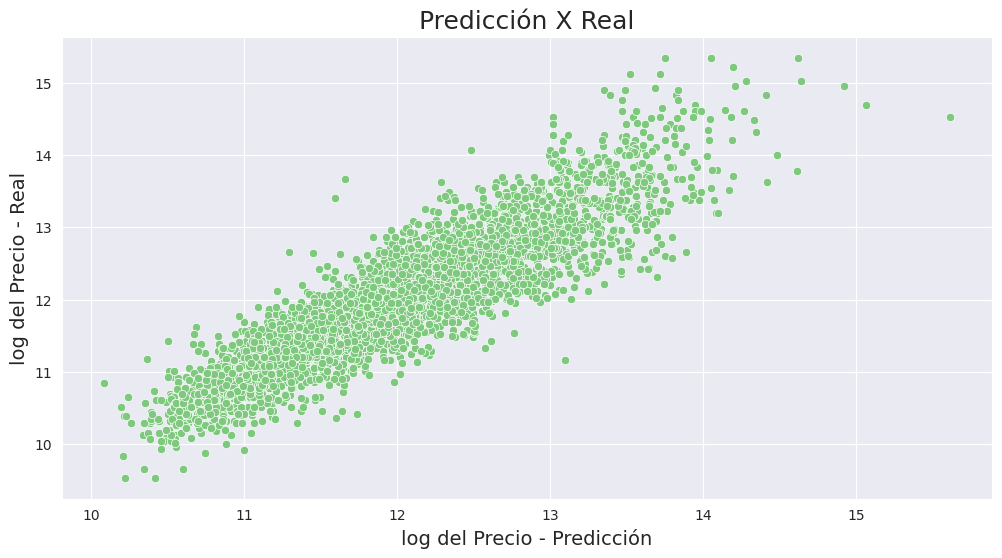

In [65]:
ax=sns.scatterplot(x=y_predicho_train,y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('log del Precio - Predicción', fontsize=14)
ax.set_ylabel('log del Precio - Real', fontsize=14)
ax

La idea de este gráfico es que esperamos que los puntos sigan el patrón de una recta. Cuanto más sigue una recta, o sea, cuanto menos espacios, cuanto más siguen una línea los puntos, o sea, cuanto menos dispersos los puntos están, menores los errores de las estimaciones.
Podemos ver un comportamiento razonable, sin embargo, podemos ver que para valores más altos de los inmuebles, hay una mayor dispersión de los puntos, pero eso puede deberse a ese problema de asimetría que vimos en los datos originales, donde tenemos poca información en este rango, el rango en que los inmuebles son de lujo.
Estos inmuebles de lujo tienen características más peculiares ubicados en regiones muy diferentes a los de los otros inmuebles. Para mejorar el ajuste del modelo tenemos que buscar más variables explicativas que sean relevantes para captar mejor la diferencia entre los precios, pero nuestro gráfico no es tan malo, sigue más o menos una recta, podemos conformarnos con él.

## Obteniendo los residuos

Los residuos son el término u del modelo, el término u que representa la parte de la variación en la variable dependiente que no pudo ser explicada por nuestro modelo, por las variables explicativas.
Los residuos son computados como la diferencia entre este término, el lnY menos este término aquí, lnβ1 + β2 multiplicado por log X2 + β3 multiplicado por lnX3. Entonces esa es la diferencia entre el valor verdadero y el valor estimado de lnY.

In [66]:
residuo=y_train-y_predicho_train  # son los valores reales de Y menos los valores estimados predichos

## Graficando la distribuición de frecuencias de los residuos

/tmp/ipython-input-2338582065.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(residuo)


<Axes: title={'center': 'Distribuición de Frecuencias de los Residuos'}, xlabel='log del Precio', ylabel='Density'>

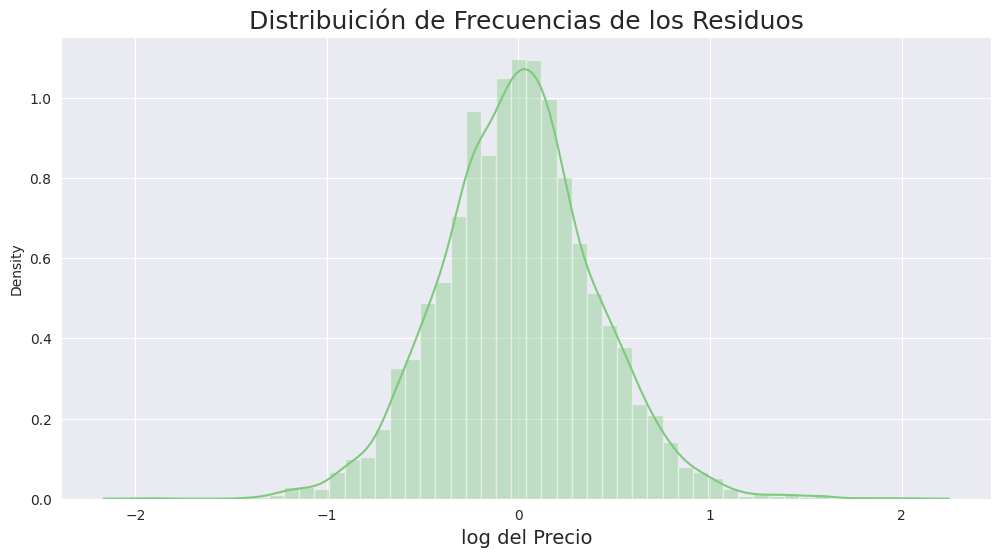

In [69]:
ax=sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('log del Precio', fontsize=14)
ax

Aquí tenemos una forma y estamos felices porque podemos ver que la distribución de los residuos se comporta bien, o sea, se parece más o menos a la distribución normal.
El comportamiento principal de los residuos, que era la distribución cercana a la distribución normal, con poca asimetría. Y también los puntos en este gráfico que van siguiendo más o menos una recta para que el modelo sea al menos razonable.